In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_columns', None)

## Going through the different csvs to see what we're working with:

### - GAMES

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           122 non-null    int64 
 1   season           122 non-null    int64 
 2   week             122 non-null    int64 
 3   gameDate         122 non-null    object
 4   gameTimeEastern  122 non-null    object
 5   homeTeamAbbr     122 non-null    object
 6   visitorTeamAbbr  122 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


Games doesn't seem very useful...

### - PLAYERS

In [4]:
players = pd.read_csv('data/players.csv')

In [5]:
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflId             1679 non-null   int64 
 1   height            1679 non-null   object
 2   weight            1679 non-null   int64 
 3   birthDate         1447 non-null   object
 4   collegeName       1455 non-null   object
 5   officialPosition  1679 non-null   object
 6   displayName       1679 non-null   object
dtypes: int64(2), object(5)
memory usage: 91.9+ KB


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


Can use this for name/id, height, weight, age and position - not sure how useful college is...

### - PLAYS

In [6]:
plays = pd.read_csv('data/plays.csv')

In [7]:
plays.info()
plays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8558 non-null   int64  
 1   playId                  8558 non-null   int64  
 2   playDescription         8558 non-null   object 
 3   quarter                 8558 non-null   int64  
 4   down                    8558 non-null   int64  
 5   yardsToGo               8558 non-null   int64  
 6   possessionTeam          8558 non-null   object 
 7   defensiveTeam           8558 non-null   object 
 8   yardlineSide            8433 non-null   object 
 9   yardlineNumber          8558 non-null   int64  
 10  gameClock               8558 non-null   object 
 11  preSnapHomeScore        8558 non-null   int64  
 12  preSnapVisitorScore     8558 non-null   int64  
 13  passResult              8558 non-null   object 
 14  penaltyYards            756 non-null    

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,13:18,0,0,C,NaN,28,28,NaN,NaN,NaN,NaN,NaN,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,12:23,0,0,C,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,09:56,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,09:46,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


These all appear to be passing plays - the runs have already been removed.

In [8]:
plays.dropBackType.value_counts()

TRADITIONAL               6542
SCRAMBLE                   899
DESIGNED_ROLLOUT_RIGHT     286
DESIGNED_ROLLOUT_LEFT      149
SCRAMBLE_ROLLOUT_RIGHT     125
SCRAMBLE_ROLLOUT_LEFT       23
DESIGNED_RUN                 5
UNKNOWN                      1
Name: dropBackType, dtype: int64

In [9]:
plays[plays.dropBackType == 'SCRAMBLE']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
43,2021090900,2279,(1:11) (Shotgun) D.Prescott sacked at TB 33 fo...,2,2,10,DAL,TB,TB,21,01:11,21,16,S,NaN,-12,-12,NaN,NaN,NaN,NaN,NaN,NaN,89.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",SCRAMBLE,0,Quarters,Zone
45,2021090900,2330,(:28) (Shotgun) D.Prescott scrambles left end ...,2,3,32,DAL,TB,TB,43,00:28,21,16,R,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,67.0,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"3 DL, 3 LB, 5 DB",SCRAMBLE,0,Quarters,Zone
67,2021090900,3364,(2:03) (Shotgun) D.Prescott scrambles up the m...,3,1,10,DAL,TB,TB,27,02:03,28,19,R,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,83.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",SCRAMBLE,0,Cover-6,Zone
109,2021091200,843,"(2:51) (No Huddle, Shotgun) M.Ryan scrambles l...",1,3,9,ATL,PHI,PHI,32,02:51,3,7,R,NaN,8,8,NaN,NaN,NaN,NaN,NaN,NaN,78.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 2 LB, 5 DB",SCRAMBLE,0,Quarters,Zone
114,2021091200,1153,(14:43) (Shotgun) J.Hurts pass short right to ...,2,1,10,PHI,ATL,PHI,17,14:43,6,7,C,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,27.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"2 DL, 4 LB, 5 DB",SCRAMBLE,1,Cover-3,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539,2021110100,3471,(12:37) P.Mahomes scrambles right end ran ob a...,4,2,6,KC,NYG,NYG,48,12:37,14,17,R,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN,58.0,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",SCRAMBLE,1,Quarters,Zone
8547,2021110100,3909,(5:42) D.Jones pass short middle to D.Booker t...,4,1,10,NYG,KC,NYG,39,05:42,17,17,C,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",SCRAMBLE,1,Cover-3,Zone
8548,2021110100,3955,(4:54) (Shotgun) D.Jones pass incomplete short...,4,3,7,NYG,KC,NYG,42,04:54,17,17,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE,0,Cover-1,Man
8553,2021110100,4310,(1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...,4,3,8,KC,NYG,NYG,8,01:56,17,17,S,NaN,-8,-8,NaN,NaN,NaN,NaN,NaN,NaN,18.0,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"1 DL, 3 LB, 7 DB",SCRAMBLE,0,Bracket,Other


### - SCOUT DATA

In [10]:
scout_data = pd.read_csv('data/pffScoutingData.csv')

In [11]:
scout_data.info()
scout_data.head(23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5   pff_hit                 94127 non-null   float64
 6   pff_hurry               94127 non-null   float64
 7   pff_sack                94127 non-null   float64
 8   pff_beatenByDefender    48087 non-null   float64
 9   pff_hitAllowed          48087 non-null   float64
 10  pff_hurryAllowed        48087 non-null   float64
 11  pff_sackAllowed         48087 non-null   float64
 12  pff_nflIdBlockedPlayer  46526 non-null   float64
 13  pff_blockType           47904 non-null   object 
 14  pff_backFieldBlock  

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0
5,2021090900,97,41233,Pass Route,RWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021090900,97,41263,Pass Rush,LEO,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0
8,2021090900,97,42403,Pass Rush,ROLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021090900,97,42404,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,PP,0.0


Looks like every play (passing play) has all 22 positions covered.

In [12]:
scout_data[scout_data.pff_beatenByDefender == 1.0]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
224,2021090900,559,42377,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,42403.0,PP,0.0
226,2021090900,559,42404,Pass Block,LG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,53504.0,PP,0.0
282,2021090900,687,47873,Pass Block,RG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,46081.0,PP,0.0
336,2021090900,788,42654,Pass Block,RT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,53461.0,PP,0.0
571,2021090900,1392,52554,Pass Block,C,NaN,NaN,NaN,1.0,0.0,0.0,0.0,40074.0,PP,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186515,2021103112,4167,52938,Pass Block,RT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,52525.0,PP,0.0
186946,2021110100,917,46103,Pass Block,RG,NaN,NaN,NaN,1.0,0.0,0.0,0.0,43326.0,PP,0.0
186996,2021110100,1083,52507,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,52792.0,PA,0.0
187062,2021110100,1267,52507,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,42406.0,PP,0.0


In [13]:
scout_data['block_fail'] = scout_data.pff_beatenByDefender + scout_data.pff_hitAllowed + scout_data.pff_hurryAllowed + scout_data.pff_sackAllowed

In [14]:
scout_data[scout_data.block_fail > 0]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0,1.0
16,2021090900,97,46163,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,SW,0.0,1.0
18,2021090900,97,52421,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,PP,0.0,1.0
95,2021090900,349,43293,Pass Block,HB-L,NaN,NaN,NaN,0.0,1.0,0.0,0.0,38588.0,PU,1.0,1.0
224,2021090900,559,42377,Pass Block,LT,NaN,NaN,NaN,1.0,0.0,0.0,0.0,42403.0,PP,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188195,2021110100,4392,43695,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,1.0,0.0,43338.0,SW,0.0,1.0
188198,2021110100,4392,46103,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43326.0,PP,0.0,1.0
188210,2021110100,4411,37090,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42406.0,PP,0.0,1.0
188239,2021110100,4433,43695,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43338.0,SW,0.0,1.0


### - WEEKLY

In [15]:
w1 = pd.read_csv('data/week1.csv')

In [16]:
w1.info()
w1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118122 entries, 0 to 1118121
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1118122 non-null  int64  
 1   playId         1118122 non-null  int64  
 2   nflId          1069508 non-null  float64
 3   frameId        1118122 non-null  int64  
 4   time           1118122 non-null  object 
 5   jerseyNumber   1069508 non-null  float64
 6   team           1118122 non-null  object 
 7   playDirection  1118122 non-null  object 
 8   x              1118122 non-null  float64
 9   y              1118122 non-null  float64
 10  s              1118122 non-null  float64
 11  a              1118122 non-null  float64
 12  dis            1118122 non-null  float64
 13  o              1069508 non-null  float64
 14  dir            1069508 non-null  float64
 15  event          1118122 non-null  object 
dtypes: float64(9), int64(3), object(4)
memory usage: 136.5

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


This has some pretty amazing player tracking data.

In [17]:
tb1w1 = w1[w1.gameId == 2021090900][w1.playId == 97][w1.jerseyNumber == 12.0]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_58639/2052821705.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tb1w1 = w1[w1.gameId == 2021090900][w1.playId == 97][w1.jerseyNumber == 12.0]


<AxesSubplot:xlabel='x', ylabel='y'>

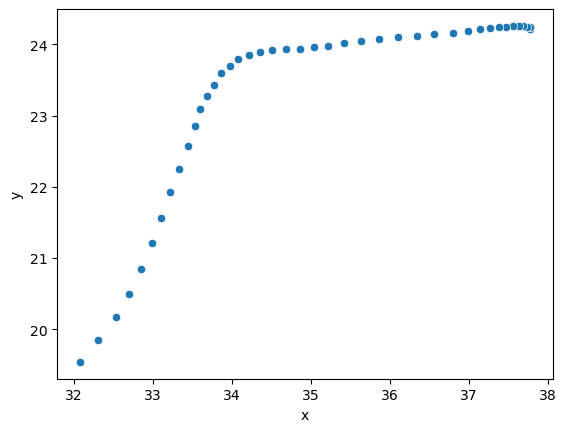

In [18]:
sns.scatterplot(data=tb1w1, x = 'x', y='y')

Above is the dropback pattern of the quarterback.

#### Metric to think about and way to analyze - see where linemen converge.
##### Other way of looking at this - set play to outcome sack or not (could also do multiple outcomes) and create an ML analysis based on the players.  Need things like blitz, time the qbheld the ball, etc.  Remove trick plays.

### TODOs

0. Show an example of the movement of all players and the ball.
1. Isolate all linemen.
2. Identify best and worst blockers by collective sacks given up, etc.
3. Try to capture team statistical info to merge into analysis.
4. Try to capture opponent player info to merge into analysis.
5. Metric track and strategy track?

## Let's dive more into the weekly and see what each datapoint means

In [19]:
w1_play1 = w1[w1.gameId == 2021090900][w1.playId == 97]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_58639/4216854566.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  w1_play1 = w1[w1.gameId == 2021090900][w1.playId == 97]


In [20]:
w1_play1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 988
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameId         989 non-null    int64  
 1   playId         989 non-null    int64  
 2   nflId          946 non-null    float64
 3   frameId        989 non-null    int64  
 4   time           989 non-null    object 
 5   jerseyNumber   946 non-null    float64
 6   team           989 non-null    object 
 7   playDirection  989 non-null    object 
 8   x              989 non-null    float64
 9   y              989 non-null    float64
 10  s              989 non-null    float64
 11  a              989 non-null    float64
 12  dis            989 non-null    float64
 13  o              946 non-null    float64
 14  dir            946 non-null    float64
 15  event          989 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 131.4+ KB


In [21]:
946/22

43.0

43 datapoints per player, assuming the ball has 43 as well:

In [22]:
946+43

989

In [23]:
a, b = w1_play1['time'].max()[-6:-4], w1_play1['time'].min()[-4:-2]
a, b

('35', '.1')

In [24]:
int(a) + float(b)

35.1

In [25]:
# def play_seconds(play_start, play_end):
#     #Pull out the mins, seconds, and milliseconds
#     start_min, end_min = int(play_start[-9:-7]) * 600, int(play_end[-9:-7]) * 600
#     start_sec, end_sec = int(play_start[-6:-4]) * 10, int(play_end[-6:-4]) * 10
#     start_msec, end_msec = int(play_start[-3]), int(play_end[-3])
#     return .1 + ((end_min + end_sec + end_msec) - (start_min + start_sec + start_msec))/10

def play_seconds(playId, gameId):
    return playId / 230

# Or can run an np.apply within a groupby function that groups plays together by gameId and 
    
    

In [26]:
#play_seconds(w1_play1['time'].min(),w1_play1['time'].max())

In [27]:
w1.playId.value_counts()

2063    4991
3406    4968
2129    4669
1938    3312
620     3289
        ... 
2203     575
3610     575
2426     506
1744     483
3606     483
Name: playId, Length: 1021, dtype: int64

In [28]:
w1_play_a = w1[w1.playId == 3406][w1.gameId == 2021090900]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_58639/3820246788.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  w1_play_a = w1[w1.playId == 3406][w1.gameId == 2021090900]


In [29]:
w1_play_a[w1_play_a.team == 'football'].gameId.value_counts()

2021090900    177
Name: gameId, dtype: int64

In [30]:
w1_play_a

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
64515,2021090900,3406,35441.0,1,2021-09-10T02:55:15.900,93.0,TB,right,90.61,28.14,0.05,0.04,0.01,285.95,37.17,None
64516,2021090900,3406,35441.0,2,2021-09-10T02:55:16.000,93.0,TB,right,90.61,28.14,0.04,0.04,0.00,285.95,36.93,None
64517,2021090900,3406,35441.0,3,2021-09-10T02:55:16.100,93.0,TB,right,90.61,28.15,0.04,0.04,0.01,285.95,34.10,None
64518,2021090900,3406,35441.0,4,2021-09-10T02:55:16.200,93.0,TB,right,90.61,28.15,0.03,0.04,0.00,285.95,35.34,None
64519,2021090900,3406,35441.0,5,2021-09-10T02:55:16.300,93.0,TB,right,90.61,28.14,0.03,0.03,0.01,285.95,39.06,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68581,2021090900,3406,NaN,173,2021-09-10T02:55:33.100,NaN,football,right,80.42,29.07,1.47,1.30,0.14,NaN,NaN,pass_forward
68582,2021090900,3406,NaN,174,2021-09-10T02:55:33.200,NaN,football,right,83.80,26.87,21.35,0.64,4.03,NaN,NaN,None
68583,2021090900,3406,NaN,175,2021-09-10T02:55:33.300,NaN,football,right,85.59,25.68,21.28,1.13,2.15,NaN,NaN,None
68584,2021090900,3406,NaN,176,2021-09-10T02:55:33.400,NaN,football,right,87.36,24.49,21.22,1.52,2.13,NaN,NaN,None


In [31]:
len(w1_play_a)/230

17.7

In [32]:
4071/230 

17.7

In [33]:
#play_seconds(w1_play_a['time'].min(),w1_play_a['time'].max())

In [34]:
4968/23

216.0

In [35]:
w1_play_a['time'].min(),w1_play_a['time'].max()

('2021-09-10T02:55:15.900', '2021-09-10T02:55:33.500')

##### Each data point is 1/10th of a second for every player and the ball during a play

## Map of players and ball

In [36]:
w1_play1.jerseyNumber = w1_play1.jerseyNumber.fillna(0)

In [37]:
player_list = list(w1_play1.jerseyNumber.unique())

In [38]:
player_list

[12.0,
 87.0,
 81.0,
 25.0,
 66.0,
 13.0,
 90.0,
 76.0,
 94.0,
 74.0,
 42.0,
 30.0,
 14.0,
 26.0,
 91.0,
 18.0,
 65.0,
 6.0,
 78.0,
 7.0,
 11.0,
 97.0,
 0.0]

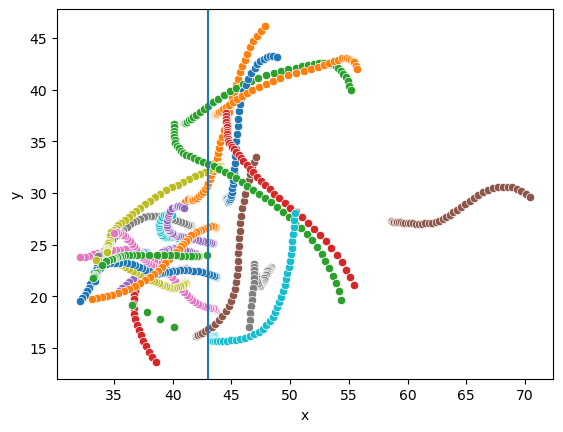

In [39]:
for n in player_list:
    data = w1_play1[w1_play1.jerseyNumber == n]
    sns.scatterplot(data = data, x = 'x', y= 'y')
# Plot line of scrimmage
plt.axvline(43)
plt.show()

In [40]:
tb1w1 = w1[w1.gameId == 2021090900][w1.playId == 97][w1.jerseyNumber == 12.0]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_58639/2052821705.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tb1w1 = w1[w1.gameId == 2021090900][w1.playId == 97][w1.jerseyNumber == 12.0]


## Base Analysis - Linemen Blocking

##### I will examine all linemen plays using the Scouting report.  To keep things simple we will use only PP plays and remove the single pass route example.
- Next, go back and isolate the QB for straight dropbacks to control for that.

In [41]:
scout_data.pff_positionLinedUp.value_counts()

QB       8557
RG       8557
C        8557
LT       8557
LG       8557
RT       8555
RCB      8224
LCB      8159
LWR      8134
RWR      8033
ROLB     5325
LOLB     5070
DRT      4812
LEO      4659
DLT      4371
REO      4287
LLB      4202
FSL      3793
FSR      3764
RLB      3627
SLWR     3546
FS       3512
RILB     3490
SRWR     3468
SCBR     3422
LILB     3336
SCBL     3246
LE       3204
HB-L     2870
HB-R     2676
RE       2383
TE-R     2241
SRoWR    1820
SRiWR    1820
SCBoL    1690
TE-L     1675
HB       1624
MLB      1595
SLiWR    1432
SLoWR    1432
SCBoR    1342
NT       1255
SCBiL    1125
SCBiR     906
SSL       799
SSR       758
NRT       752
NLT       593
TE-iR     487
TE-oR     487
SS        424
TE-oL     292
TE-iL     292
FB-R      176
FB        147
FB-L      137
Name: pff_positionLinedUp, dtype: int64

In [42]:
linemen = scout_data[scout_data.pff_positionLinedUp.isin(['RT', 'RG','C','LG','LT'])]
linemen.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,block_fail
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0,0.0
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0,1.0
9,2021090900,97,42404,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,PP,0.0,0.0
16,2021090900,97,46163,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,SW,0.0,1.0
18,2021090900,97,52421,Pass Block,RT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,53441.0,PP,0.0,1.0


In [43]:
linemen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42783 entries, 4 to 188249
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  42783 non-null  int64  
 1   playId                  42783 non-null  int64  
 2   nflId                   42783 non-null  int64  
 3   pff_role                42783 non-null  object 
 4   pff_positionLinedUp     42783 non-null  object 
 5   pff_hit                 0 non-null      float64
 6   pff_hurry               0 non-null      float64
 7   pff_sack                0 non-null      float64
 8   pff_beatenByDefender    42782 non-null  float64
 9   pff_hitAllowed          42782 non-null  float64
 10  pff_hurryAllowed        42782 non-null  float64
 11  pff_sackAllowed         42782 non-null  float64
 12  pff_nflIdBlockedPlayer  41687 non-null  float64
 13  pff_blockType           42765 non-null  object 
 14  pff_backFieldBlock      42764 non-nul

In [44]:
linemen.pff_blockType.value_counts()

PP    24264
PT     5801
PA     5650
SW     3009
CL     2422
NB     1067
PR      248
UP      217
SR       85
CH        2
Name: pff_blockType, dtype: int64

In [45]:
linemen = linemen[linemen.pff_role == 'Pass Block']

In [46]:
linemen = linemen[linemen.pff_blockType == 'PP']
linemen_clean = linemen.drop(columns = ['pff_hit','pff_hurry','pff_sack','pff_blockType','pff_backFieldBlock'], inplace = True)

In [47]:
linemen.drop(columns=['pff_role'], inplace=True)

In [48]:
average_block_fail_rate = linemen.block_fail.value_counts(normalize = True)[1]
average_block_fail_rate

0.1383119024068579

In [49]:
linemen[['pff_beatenByDefender','pff_hitAllowed','pff_hurryAllowed','pff_sackAllowed']].value_counts()

pff_beatenByDefender  pff_hitAllowed  pff_hurryAllowed  pff_sackAllowed
0.0                   0.0             0.0               0.0                20908
                                      1.0               0.0                 1395
1.0                   0.0             0.0               0.0                 1371
0.0                   1.0             0.0               0.0                  362
                      0.0             0.0               1.0                  228
dtype: int64

In [50]:
linemen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24264 entries, 7 to 188249
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  24264 non-null  int64  
 1   playId                  24264 non-null  int64  
 2   nflId                   24264 non-null  int64  
 3   pff_positionLinedUp     24264 non-null  object 
 4   pff_beatenByDefender    24264 non-null  float64
 5   pff_hitAllowed          24264 non-null  float64
 6   pff_hurryAllowed        24264 non-null  float64
 7   pff_sackAllowed         24264 non-null  float64
 8   pff_nflIdBlockedPlayer  24264 non-null  float64
 9   block_fail              24264 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.0+ MB


In [51]:
players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


In [ ]:
players.groupby('displayName').height.count()[players.groupby('displayName').height.count()>1]

In [52]:
lineman_grouped = linemen.groupby('nflId').mean()

In [54]:
lineman_grouped.drop(columns = ['gameId','playId','pff_nflIdBlockedPlayer'], inplace= True)
lineman_grouped

,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail
nflId,,,,,
29550,0.055944,0.013986,0.041958,0.020979,0.132867
30869,0.050000,0.012500,0.031250,0.000000,0.093750
33107,0.045802,0.038168,0.045802,0.030534,0.160305
34457,0.000000,0.000000,0.000000,0.000000,0.000000
34472,0.009346,0.000000,0.009346,0.009346,0.028037
...,...,...,...,...,...
53861,0.000000,0.000000,0.000000,0.000000,0.000000
53868,0.000000,0.000000,0.000000,0.500000,0.500000
53954,0.000000,0.000000,1.000000,0.000000,1.000000


In [119]:
lineman_merged = lineman_grouped.merge(players, on = 'nflId', how = 'left')

In [120]:
lineman_merged

,nflId,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail,height,weight,birthDate,collegeName,officialPosition,displayName
0,29550,0.055944,0.013986,0.041958,0.020979,0.132867,6-4,328,1982-01-22,Arkansas,T,Jason Peters
1,30869,0.050000,0.012500,0.031250,0.000000,0.093750,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth
2,33107,0.045802,0.038168,0.045802,0.030534,0.160305,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown
3,34457,0.000000,0.000000,0.000000,0.000000,0.000000,6-4,330,1987-01-25,Alabama,T,Andre Smith
4,34472,0.009346,0.000000,0.009346,0.009346,0.028037,6-4,311,1985-11-19,California,C,Alex Mack
...,...,...,...,...,...,...,...,...,...,...,...,...
263,53861,0.000000,0.000000,0.000000,0.000000,0.000000,6-5,330,NaN,NaN,G,Robert Jones
264,53868,0.000000,0.000000,0.000000,0.500000,0.500000,6-6,315,NaN,NaN,T,Alaric Jackson
265,53954,0.000000,0.000000,1.000000,0.000000,1.000000,6-5,319,NaN,NaN,G,Tommy Kraemer
266,53994,0.000000,0.000000,0.000000,0.000000,0.000000,6-5,300,NaN,NaN,C,Ryan McCollum


In [121]:
plays = pd.DataFrame(linemen.groupby('nflId').nflId.count())
plays = plays.rename(columns = {'nflId':'plays'})

In [122]:
lineman_merged = lineman_merged.merge(plays, left_on = 'nflId', right_index = True)

In [130]:
lineman_merged

,nflId,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail,height,weight,collegeName,officialPosition,displayName,plays,age
0,29550,0.055944,0.013986,0.041958,0.020979,0.132867,6-4,328,Arkansas,T,Jason Peters,143,40
1,30869,0.050000,0.012500,0.031250,0.000000,0.093750,6-7,330,Louisiana State,T,Andrew Whitworth,160,41
2,33107,0.045802,0.038168,0.045802,0.030534,0.160305,6-4,315,Virginia Tech,T,Duane Brown,131,37
3,34457,0.000000,0.000000,0.000000,0.000000,0.000000,6-4,330,Alabama,T,Andre Smith,11,35
4,34472,0.009346,0.000000,0.009346,0.009346,0.028037,6-4,311,California,C,Alex Mack,107,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,53861,0.000000,0.000000,0.000000,0.000000,0.000000,6-5,330,NaN,G,Robert Jones,2,0
264,53868,0.000000,0.000000,0.000000,0.500000,0.500000,6-6,315,NaN,T,Alaric Jackson,2,0
265,53954,0.000000,0.000000,1.000000,0.000000,1.000000,6-5,319,NaN,G,Tommy Kraemer,1,0
266,53994,0.000000,0.000000,0.000000,0.000000,0.000000,6-5,300,NaN,C,Ryan McCollum,2,0


In [124]:
lineman_merged.birthDate = lineman_merged.birthDate.fillna('2022')

In [127]:
lineman_merged['age'] = 2022 - lineman_merged.birthDate.str[:4].astype(int)
lineman_merged

,nflId,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,block_fail,height,weight,birthDate,collegeName,officialPosition,displayName,plays,birthyear,age
0,29550,0.055944,0.013986,0.041958,0.020979,0.132867,6-4,328,1982-01-22,Arkansas,T,Jason Peters,143,1982,40
1,30869,0.050000,0.012500,0.031250,0.000000,0.093750,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth,160,1981,41
2,33107,0.045802,0.038168,0.045802,0.030534,0.160305,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,131,1985,37
3,34457,0.000000,0.000000,0.000000,0.000000,0.000000,6-4,330,1987-01-25,Alabama,T,Andre Smith,11,1987,35
4,34472,0.009346,0.000000,0.009346,0.009346,0.028037,6-4,311,1985-11-19,California,C,Alex Mack,107,1985,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,53861,0.000000,0.000000,0.000000,0.000000,0.000000,6-5,330,2022,NaN,G,Robert Jones,2,2022,0
264,53868,0.000000,0.000000,0.000000,0.500000,0.500000,6-6,315,2022,NaN,T,Alaric Jackson,2,2022,0
265,53954,0.000000,0.000000,1.000000,0.000000,1.000000,6-5,319,2022,NaN,G,Tommy Kraemer,1,2022,0
266,53994,0.000000,0.000000,0.000000,0.000000,0.000000,6-5,300,2022,NaN,C,Ryan McCollum,2,2022,0


In [128]:
lineman_merged = lineman_merged.drop(columns = ['birthDate','birthyear'])

In [137]:
linemen = lineman_merged[['displayName','officialPosition','collegeName','height','weight','age','plays','block_fail','pff_beatenByDefender','pff_hitAllowed','pff_hurryAllowed','pff_sackAllowed']]
linemen = linemen.set_index('displayName')

In [143]:
linemen.sort_values(by = 'pff_sackAllowed', ascending = False).head(25)

,officialPosition,collegeName,height,weight,age,plays,block_fail,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
displayName,,,,,,,,,,,
Alaric Jackson,T,NaN,6-6,315,0,2,0.500000,0.000000,0.000000,0.000000,0.500000
Will Holden,T,Vanderbilt,6-7,312,29,2,0.500000,0.000000,0.000000,0.000000,0.500000
Jordan Simmons,G,Southern California,6-4,339,28,3,0.333333,0.000000,0.000000,0.000000,0.333333
Korey Cunningham,T,Cincinnati,6-6,305,27,3,0.666667,0.333333,0.000000,0.000000,0.333333
Lachavious Simmons,G,NaN,6-5,315,0,10,0.500000,0.100000,0.000000,0.200000,0.200000
Ethan Pocic,C,Louisiana State,6-6,320,27,19,0.157895,0.000000,0.000000,0.052632,0.105263
Cedric Ogbuehi,T,Texas A&amp;M,6-5,310,30,10,0.100000,0.000000,0.000000,0.000000,0.100000
Christopher Hubbard,T,Alabama-Birmingham,6-4,295,31,11,0.272727,0.090909,0.090909,0.000000,0.090909
Saahdiq Charles,T,Louisiana State,6-4,295,23,33,0.151515,0.000000,0.000000,0.060606,0.090909


In [142]:
linemen.plays.describe()

count    268.000000
mean      90.537313
std       61.719755
min        1.000000
25%       32.750000
50%       89.000000
75%      134.000000
max      259.000000
Name: plays, dtype: float64

### Thinking I should normalize all players in the 25% and above range.  Basically block fail rate per 100 passing plays.  Actually, a better thing is to take the top 32 * 6 - 5 linemen and one backup.  TRY FOR NEXT TIME.

In [144]:
linemen_low = linemen[linemen.plays <= 32]
linemen = linemen[linemen.plays > 32]
linemen_low.plays.describe()

count    67.000000
mean     12.820896
std       9.651386
min       1.000000
25%       2.500000
50%      11.000000
75%      21.500000
max      32.000000
Name: plays, dtype: float64

In [145]:
linemen.describe()
# dont forget, these are just for straight dropback pass protection

,weight,age,plays,block_fail,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,314.800995,25.671642,116.442786,0.136510,0.055016,0.014399,0.058001,0.009094
std,11.261447,9.084142,48.548099,0.058106,0.029421,0.014520,0.031829,0.011677
min,260.000000,0.000000,33.000000,0.014925,0.000000,0.000000,0.000000,0.000000
25%,308.000000,25.000000,77.000000,0.098901,0.035088,0.000000,0.035461,0.000000
50%,315.000000,28.000000,118.000000,0.130435,0.053333,0.011765,0.054545,0.007463
75%,322.000000,30.000000,143.000000,0.167598,0.072626,0.023166,0.074324,0.014085
max,350.000000,41.000000,259.000000,0.327586,0.152941,0.086957,0.162162,0.090909


officialPosition


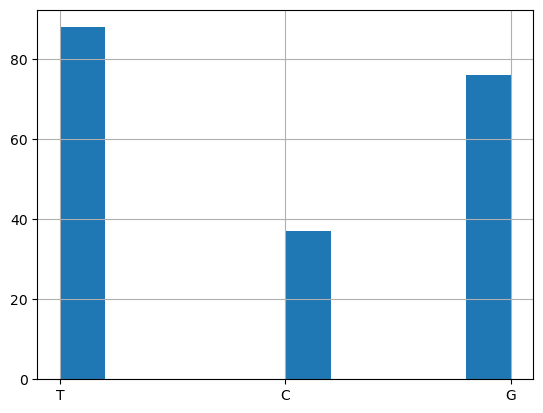

collegeName


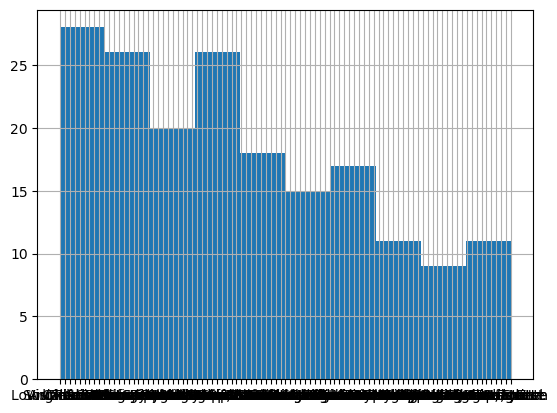

height


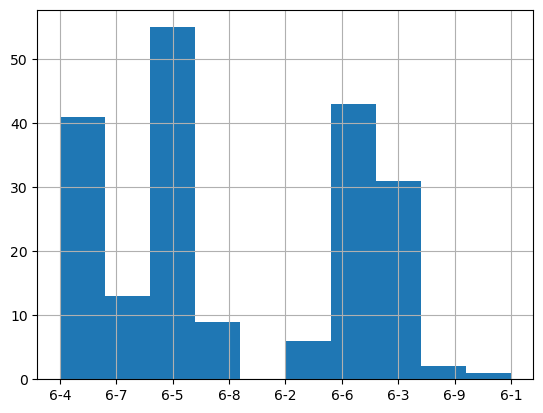

weight


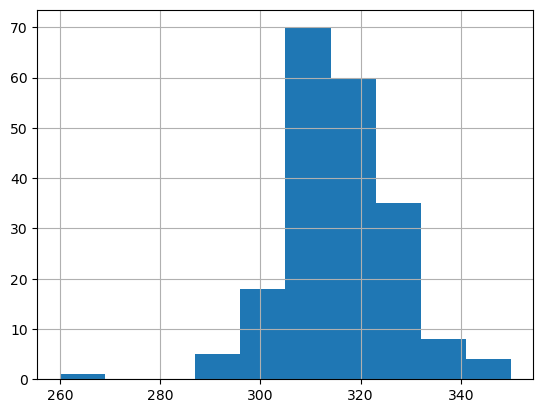

age


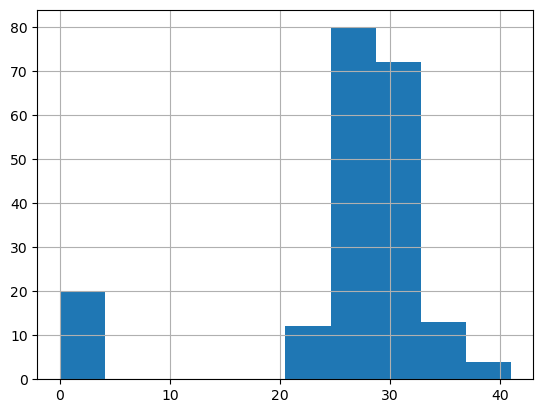

plays


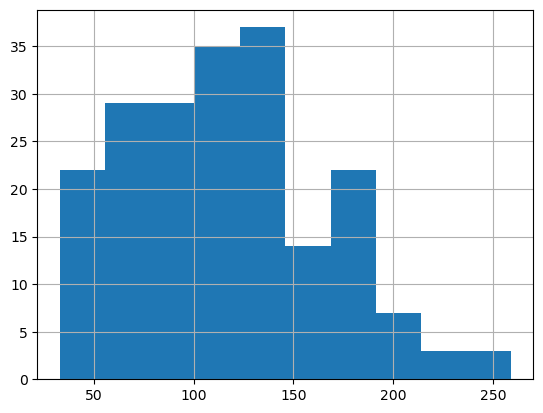

block_fail


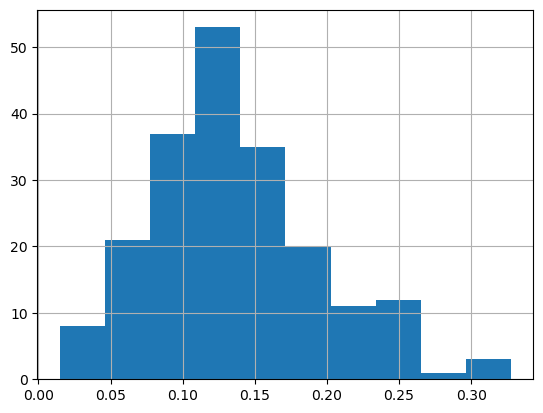

pff_beatenByDefender


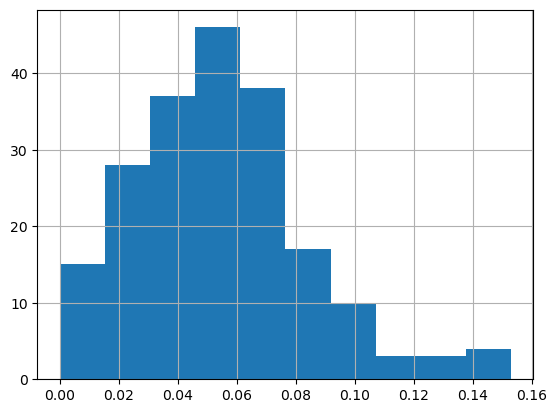

pff_hitAllowed


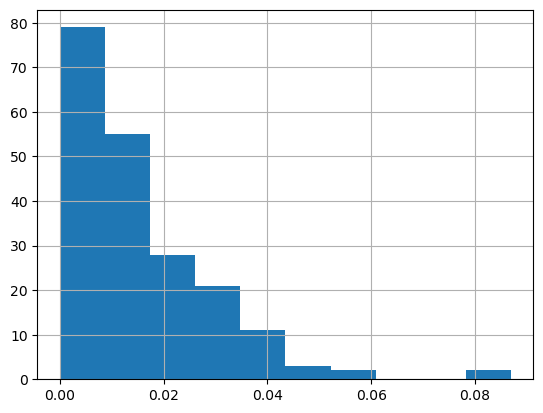

pff_hurryAllowed


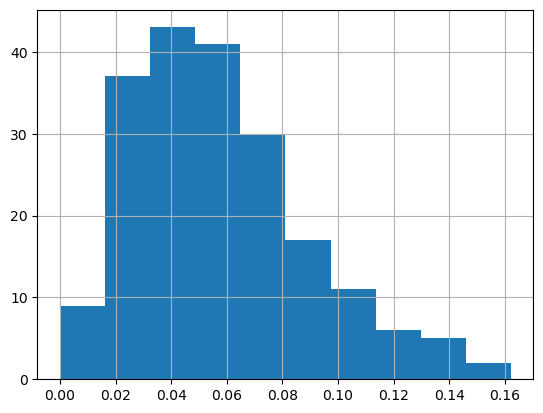

pff_sackAllowed


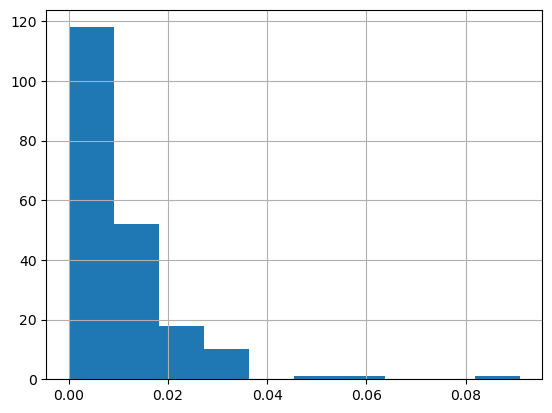

In [148]:
for i in linemen.columns:
    print(i)
    linemen[i].hist()
    plt.show()

In [149]:
linemen.sort_values(by = 'block_fail').head(20)

,officialPosition,collegeName,height,weight,age,plays,block_fail,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
displayName,,,,,,,,,,,
Rodney Hudson,C,Florida State,6-2,315,33,67,0.014925,0.014925,0.000000,0.000000,0.000000
Evan Brown,C,Southern Methodist,6-2,302,26,120,0.025000,0.008333,0.000000,0.016667,0.000000
Erik McCoy,C,Texas A&amp;M,6-4,315,25,37,0.027027,0.000000,0.027027,0.000000,0.000000
Alex Mack,C,California,6-4,311,37,107,0.028037,0.009346,0.000000,0.009346,0.009346
Ike Boettger,G,Iowa,6-6,318,28,33,0.030303,0.000000,0.000000,0.030303,0.000000
Max Garcia,C,Florida,6-4,309,31,49,0.040816,0.020408,0.000000,0.020408,0.000000
Jermaine Eluemunor,G,Texas A&amp;M,6-4,335,28,95,0.042105,0.042105,0.000000,0.000000,0.000000
Jason Kelce,C,Cincinnati,6-3,295,35,136,0.044118,0.014706,0.000000,0.029412,0.000000
Corey Linsley,C,Ohio State,6-3,301,31,125,0.048000,0.024000,0.000000,0.024000,0.000000


# Must cleanup the players csv!

In [ ]:
players.info()
players.head()

In [ ]:
for i in players.columns:
    print(players[i].nunique())

In [ ]:
players.groupby('nflId').value_counts()

In [ ]:
# Pseudocode:
# group by nflId
# display, for each column, when there is more than one record for the player
# see the range of weights
    # Could I do this via the following:
        # 1) Filter by each player Id
# Fill in missing birthdates and college name - if you wanted to be complete you could write a script to pull those off another site, just to be complete
# Otherwise, could fill with average age (from birthday) and college not used or just left null
# 

In [ ]:
players[players.duplicated('displayName', keep=False)]

In [ ]:
players[players.nflId == 53994]

In [ ]:
players.groupby('displayName').height.count()[players.groupby('displayName').height.count()>1]

In [ ]:
for i in players.columns:
    print(i)
    print(players.groupby('displayName')[i].count()[players.groupby('displayName')[i].count()>1])
    print('\n-----\n')